Tiutorial link:
https://www.pyimagesearch.com/2017/03/20/imagenet-vggnet-resnet-inception-xception-keras/

In [1]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import Xception # TensorFlow ONLY
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19

from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import argparse
import cv2

In [2]:
# define a dictionary that maps model names to their classes
# inside Keras
MODELS = {
	"vgg16": VGG16,
	"vgg19": VGG19,
	"inception": InceptionV3,
	"xception": Xception, # TensorFlow ONLY
	"resnet": ResNet50
}

In [32]:
# initialize the input image shape (224x224 pixels) along with
# the pre-processing function (this might need to be changed
# based on which model we use to classify our image)
inputShape = (224, 224)
preprocess = imagenet_utils.preprocess_input

In [33]:
# load our the network weights from disk (NOTE: if this is the
# first time you are running this script for a given network, the
# weights will need to be downloaded first -- depending on which
# network you are using, the weights can be 90-575MB, so be
# patient; the weights will be cached and subsequent runs of this
# script will be *much* faster)
print("[INFO] loading {}...".format(MODELS["vgg16"]))
Network = MODELS["vgg16"]
model = Network(weights="imagenet")

[INFO] loading <function VGG16 at 0x7f935a551290>...
553467904/553467096 [==============================] - 5s 0us/step


In [14]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
drive  gdrive  sample_data


In [16]:
os.chdir('gdrive/MyDrive')

In [18]:
os.chdir('Image_classification_1')

In [34]:
# load the input image using the Keras helper utility while ensuring
# the image is resized to `inputShape`, the required input dimensions
# for the ImageNet pre-trained network
image_path = "images/soccer_ball.jpg"
print("[INFO] loading and pre-processing image...")
image = load_img(image_path, target_size=inputShape)
image = img_to_array(image)
# our input image is now represented as a NumPy array of shape
# (inputShape[0], inputShape[1], 3) however we need to expand the
# dimension by making the shape (1, inputShape[0], inputShape[1], 3)
# so we can pass it through the network
image = np.expand_dims(image, axis=0)
# pre-process the image using the appropriate function based on the
# model that has been loaded (i.e., mean subtraction, scaling, etc.)
image = preprocess(image)

[INFO] loading and pre-processing image...


In [35]:
# classify the image
print("[INFO] classifying image with '{}'...".format(MODELS["vgg16"]))
preds = model.predict(image)
P = imagenet_utils.decode_predictions(preds)
# loop over the predictions and display the rank-5 predictions +
# probabilities to our terminal
for (i, (imagenetID, label, prob)) in enumerate(P[0]):
    print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))

[INFO] classifying image with '<function VGG16 at 0x7f935a551290>'...
40960/35363 [==================================] - 0s 0us/step
1. soccer_ball: 93.43%
2. rugby_ball: 6.06%
3. golf_ball: 0.20%
4. volleyball: 0.17%
5. tennis_ball: 0.05%


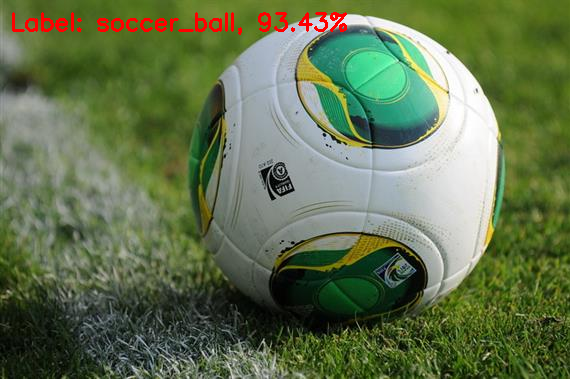

-1

In [39]:
# load the image via OpenCV, draw the top prediction on the image,
# and display the image to our screen
from google.colab.patches import cv2_imshow
orig = cv2.imread(image_path)
(imagenetID, label, prob) = P[0][0]
cv2.putText(orig, "Label: {}, {:.2f}%".format(label, prob * 100),
	(10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
cv2_imshow(orig)
cv2.waitKey(0)